<img src=images/health-fitness-image.jpg>

### Project By Kim Wolf
***

#### Import Library

In [34]:
# Import modules and libraries needed for Health and Fitness Relationship project
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import glob, os, json, datetime
from pandas import Series, DataFrame


#### Feature 1 - Load data 
Read two JSON data files.

<img src=images/exercise.jfif>
The data sets contain EXERCISE information on two different participants.

(p01) is known as participant 1, who is a 48 year old male

In [35]:
# Read in EXERCISE data from participant one (p01).
# Display the first 5 rows of data.
p01_exercise = pd.read_json("osfstorage-archive/pmdata/p01/fitbit/exercise.json" )
p01_exercise.head()

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,duration,activeDuration,steps,logType,...,elevationGain,hasGps,shouldFetchDetails,distance,distanceUnit,source,tcxLink,speed,pace,vo2Max
0,26451905128,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",94,192,1331000,1331000,1878,auto_detected,...,24.384,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26455950499,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",94,302,2202000,2202000,2786,auto_detected,...,27.432,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26467488515,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",98,354,2458000,2458000,3035,auto_detected,...,21.336,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26520401069,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",97,145,1024000,1024000,1284,auto_detected,...,21.336,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26538035127,Walk,90013,"[{'minutes': 3, 'name': 'sedentary'}, {'minute...",93,121,973000,973000,1065,auto_detected,...,3.048,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(p02) is known as participant 2, who is a 60 year old male

In [36]:
# Read in EXERCISE data from participant two (p02).
# Display the first 5 rows of data.
p02_exercise = pd.read_json("osfstorage-archive/pmdata/p02/fitbit/exercise.json" )
p02_exercise.head()

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,duration,activeDuration,steps,logType,...,shouldFetchDetails,distance,distanceUnit,source,speed,pace,tcxLink,swimLengths,poolLength,poolLengthUnit
0,26555895608,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",108.0,105,922000,922000,1139.0,auto_detected,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26516538165,Run,90009,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",136.0,544,4315000,4114000,10034.0,tracker,...,False,9.356687,Kilometer,"{'type': 'tracker', 'name': 'Versa 2', 'id': '...",8.188609,439.635126,NaN,NaN,NaN,NaN
2,26576453784,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",97.0,186,1280000,1280000,1939.0,auto_detected,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26580173239,Sport,15000,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",95.0,258,1792000,1792000,2741.0,auto_detected,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26580173240,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",88.0,197,1433000,1433000,1861.0,auto_detected,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Feature 2 - Clean EXERCISE data while combining
Clean data and perform a pandas merge with two data sets, then calculate some new values based on the new data set.

In [37]:
# Add 'Participant' as a new column name for participant one (p01) EXERCISE data
# Display the first 5 rows of data.
Exercise_p01_info = p01_exercise.assign(Participant="p01")
Exercise_p01_info.head()

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,duration,activeDuration,steps,logType,...,hasGps,shouldFetchDetails,distance,distanceUnit,source,tcxLink,speed,pace,vo2Max,Participant
0,26451905128,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",94,192,1331000,1331000,1878,auto_detected,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01
1,26455950499,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",94,302,2202000,2202000,2786,auto_detected,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01
2,26467488515,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",98,354,2458000,2458000,3035,auto_detected,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01
3,26520401069,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",97,145,1024000,1024000,1284,auto_detected,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01
4,26538035127,Walk,90013,"[{'minutes': 3, 'name': 'sedentary'}, {'minute...",93,121,973000,973000,1065,auto_detected,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p01


In [38]:
# Add 'Participant' as a new column name for participant two (p02) EXERCISE data
# Display the first 5 rows of data.
Exercise_p02_info = p02_exercise.assign(Participant="p02")
Exercise_p02_info.head()

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,duration,activeDuration,steps,logType,...,distance,distanceUnit,source,speed,pace,tcxLink,swimLengths,poolLength,poolLengthUnit,Participant
0,26555895608,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",108.0,105,922000,922000,1139.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p02
1,26516538165,Run,90009,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",136.0,544,4315000,4114000,10034.0,tracker,...,9.356687,Kilometer,"{'type': 'tracker', 'name': 'Versa 2', 'id': '...",8.188609,439.635126,NaN,NaN,NaN,NaN,p02
2,26576453784,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",97.0,186,1280000,1280000,1939.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p02
3,26580173239,Sport,15000,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",95.0,258,1792000,1792000,2741.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p02
4,26580173240,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",88.0,197,1433000,1433000,1861.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p02


In [39]:
# MERGE
# Merge participant one (p01) and participant two (p02) EXERCISE data
# Display the first 5 and last 5 rows of data.
Exercise_p_info = pd.concat([Exercise_p01_info,Exercise_p02_info])
Exercise_p_info.head(-5)

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,duration,activeDuration,steps,logType,...,distanceUnit,source,tcxLink,speed,pace,vo2Max,Participant,swimLengths,poolLength,poolLengthUnit
0,26451905128,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",94.0,192,1331000,1331000,1878.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,NaN
1,26455950499,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",94.0,302,2202000,2202000,2786.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,NaN
2,26467488515,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",98.0,354,2458000,2458000,3035.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,NaN
3,26520401069,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",97.0,145,1024000,1024000,1284.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,NaN
4,26538035127,Walk,90013,"[{'minutes': 3, 'name': 'sedentary'}, {'minute...",93.0,121,973000,973000,1065.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,29952932981,Run,90009,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",119.0,218,1126000,1126000,2238.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p02,NaN,NaN,NaN
315,29975932738,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",107.0,195,1229000,1229000,1934.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p02,NaN,NaN,NaN
316,29984508918,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",95.0,229,1689000,1689000,2408.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p02,NaN,NaN,NaN
317,30000528916,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minute...",108.0,958,5940000,5940000,9911.0,auto_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,p02,NaN,NaN,NaN


In [40]:
# Clean data file to remove unnecessary columns, create new dataframe for analysis.
Participant_info = Exercise_p_info.drop(columns=['logId','activityTypeId','calories', 'duration','activeDuration','originalStartTime','lastModified','originalDuration','logType','activityLevel','manualValuesSpecified','heartRateZones','distanceUnit','source','tcxLink','speed','pace','vo2Max','hasGps','elevationGain', 'distance','shouldFetchDetails','swimLengths','poolLength','poolLengthUnit'])
Participant_info.head(-5)

,activityName,averageHeartRate,steps,startTime,Participant
0,Walk,94.0,1878.0,2019-11-01 14:56:32,p01
1,Walk,94.0,2786.0,2019-11-01 19:03:11,p01
2,Walk,98.0,3035.0,2019-11-02 13:26:38,p01
3,Walk,97.0,1284.0,2019-11-04 21:22:08,p01
4,Walk,93.0,1065.0,2019-11-05 19:27:25,p01
...,...,...,...,...,...
314,Run,119.0,2238.0,2020-03-27 11:28:25,p02
315,Walk,107.0,1934.0,2020-03-28 16:43:07,p02
316,Walk,95.0,2408.0,2020-03-28 19:55:07,p02
317,Walk,108.0,9911.0,2020-03-29 12:40:20,p02


In [41]:
# Add new column to Participant_info dataframe. Convert startTime to convDate
Participant_info['convDate'] = pd.to_datetime(Participant_info['startTime']).dt.date
Participant_info.head(-5)

,activityName,averageHeartRate,steps,startTime,Participant,convDate
0,Walk,94.0,1878.0,2019-11-01 14:56:32,p01,2019-11-01
1,Walk,94.0,2786.0,2019-11-01 19:03:11,p01,2019-11-01
2,Walk,98.0,3035.0,2019-11-02 13:26:38,p01,2019-11-02
3,Walk,97.0,1284.0,2019-11-04 21:22:08,p01,2019-11-04
4,Walk,93.0,1065.0,2019-11-05 19:27:25,p01,2019-11-05
...,...,...,...,...,...,...
314,Run,119.0,2238.0,2020-03-27 11:28:25,p02,2020-03-27
315,Walk,107.0,1934.0,2020-03-28 16:43:07,p02,2020-03-28
316,Walk,95.0,2408.0,2020-03-28 19:55:07,p02,2020-03-28
317,Walk,108.0,9911.0,2020-03-29 12:40:20,p02,2020-03-29


In [42]:
# Limit the activityName to only include "Walk" data
# Drop the startTime column

Participant_info = Participant_info[Participant_info["activityName"] == "Walk"]
Participant_info = Participant_info.drop(columns=['startTime'])
Participant_info.head(-5)


,activityName,averageHeartRate,steps,Participant,convDate
0,Walk,94.0,1878.0,p01,2019-11-01
1,Walk,94.0,2786.0,p01,2019-11-01
2,Walk,98.0,3035.0,p01,2019-11-02
3,Walk,97.0,1284.0,p01,2019-11-04
4,Walk,93.0,1065.0,p01,2019-11-05
...,...,...,...,...,...
303,Walk,106.0,6341.0,p02,2020-03-20
305,Walk,116.0,2320.0,p02,2020-03-21
306,Walk,105.0,8817.0,p02,2020-03-22
309,Walk,100.0,6006.0,p02,2020-03-24


In [43]:
# Convert "convDate" column from object to datetime 
Participant_info["convDate"] = Participant_info["convDate"].apply(pd.to_datetime)

Participant_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 320
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   activityName      353 non-null    object        
 1   averageHeartRate  353 non-null    float64       
 2   steps             353 non-null    float64       
 3   Participant       353 non-null    object        
 4   convDate          353 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 16.5+ KB


In [44]:
# Add a new column "Month" which indicates the month of the "Walk" exercise from the "convDate" column
Participant_info["Month"] = Participant_info["convDate"].dt.month_name()

Participant_info.head(-5)

,activityName,averageHeartRate,steps,Participant,convDate,Month
0,Walk,94.0,1878.0,p01,2019-11-01,November
1,Walk,94.0,2786.0,p01,2019-11-01,November
2,Walk,98.0,3035.0,p01,2019-11-02,November
3,Walk,97.0,1284.0,p01,2019-11-04,November
4,Walk,93.0,1065.0,p01,2019-11-05,November
...,...,...,...,...,...,...
303,Walk,106.0,6341.0,p02,2020-03-20,March
305,Walk,116.0,2320.0,p02,2020-03-21,March
306,Walk,105.0,8817.0,p02,2020-03-22,March
309,Walk,100.0,6006.0,p02,2020-03-24,March


In [45]:
# Add new columns "Month" and "Year" which indicates the month and year of the "Walk" exercise from the "convDate" column
Participant_info["Month"] = Participant_info["convDate"].dt.month_name()
Participant_info["Year"] = pd.DatetimeIndex(Participant_info['convDate']).year
Participant_info.head(-5)

,activityName,averageHeartRate,steps,Participant,convDate,Month,Year
0,Walk,94.0,1878.0,p01,2019-11-01,November,2019
1,Walk,94.0,2786.0,p01,2019-11-01,November,2019
2,Walk,98.0,3035.0,p01,2019-11-02,November,2019
3,Walk,97.0,1284.0,p01,2019-11-04,November,2019
4,Walk,93.0,1065.0,p01,2019-11-05,November,2019
...,...,...,...,...,...,...,...
303,Walk,106.0,6341.0,p02,2020-03-20,March,2020
305,Walk,116.0,2320.0,p02,2020-03-21,March,2020
306,Walk,105.0,8817.0,p02,2020-03-22,March,2020
309,Walk,100.0,6006.0,p02,2020-03-24,March,2020


In [46]:
# Create new dataframe with only participant 1 (p01) walk info

p01_walk = Participant_info[Participant_info["Participant"] == "p01"]
p01_walk.head(-5)

,activityName,averageHeartRate,steps,Participant,convDate,Month,Year
0,Walk,94.0,1878.0,p01,2019-11-01,November,2019
1,Walk,94.0,2786.0,p01,2019-11-01,November,2019
2,Walk,98.0,3035.0,p01,2019-11-02,November,2019
3,Walk,97.0,1284.0,p01,2019-11-04,November,2019
4,Walk,93.0,1065.0,p01,2019-11-05,November,2019
...,...,...,...,...,...,...,...
180,Walk,98.0,8315.0,p01,2020-03-21,March,2020
181,Walk,87.0,1362.0,p01,2020-03-25,March,2020
182,Walk,100.0,3744.0,p01,2020-03-25,March,2020
183,Walk,101.0,3415.0,p01,2020-03-26,March,2020


In [47]:
# Create new dataframe with only participant 2 (p02) walk info

p02_walk = Participant_info[Participant_info["Participant"] == "p02"]
p02_walk.head(-5)

,activityName,averageHeartRate,steps,Participant,convDate,Month,Year
0,Walk,108.0,1139.0,p02,2019-11-06,November,2019
2,Walk,97.0,1939.0,p02,2019-11-07,November,2019
4,Walk,88.0,1861.0,p02,2019-11-07,November,2019
5,Walk,104.0,1561.0,p02,2019-11-08,November,2019
7,Walk,93.0,1867.0,p02,2019-11-09,November,2019
...,...,...,...,...,...,...,...
303,Walk,106.0,6341.0,p02,2020-03-20,March,2020
305,Walk,116.0,2320.0,p02,2020-03-21,March,2020
306,Walk,105.0,8817.0,p02,2020-03-22,March,2020
309,Walk,100.0,6006.0,p02,2020-03-24,March,2020


#### Feature 3 - Visualize data

<img src=images/heart_rate.jfif>
The visualization charts depict the average HEART RATE while walking for EXERCISE.

<AxesSubplot:xlabel='averageHeartRate', ylabel='Count'>

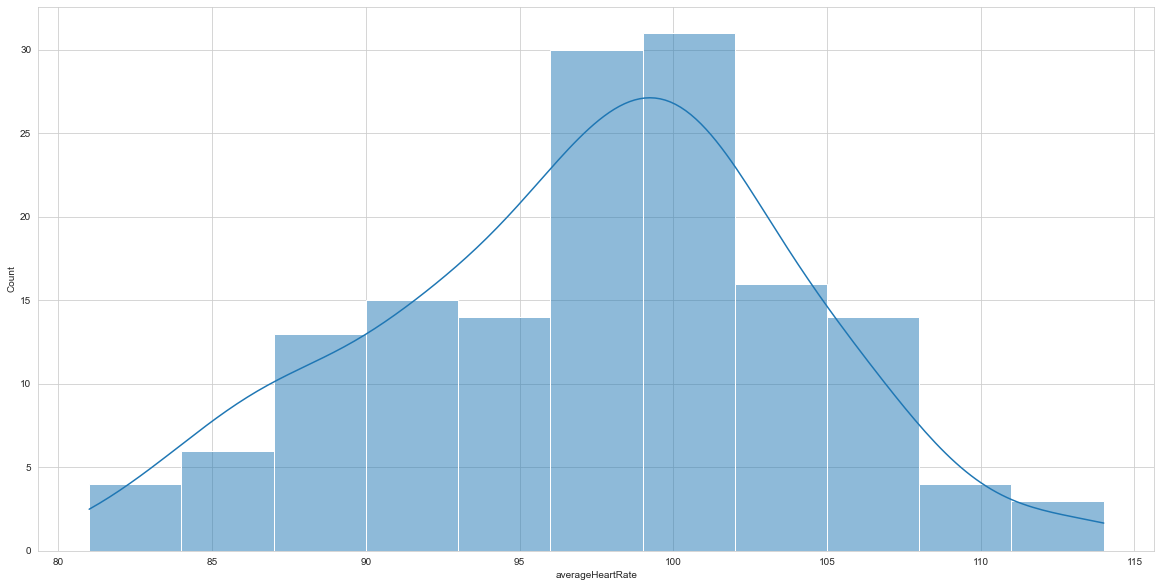

In [48]:
# Create histogram of participant 1 (p01) average heart rate while walking for exercise
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.histplot(data=p01_walk, x="averageHeartRate", kde=True)

<AxesSubplot:xlabel='averageHeartRate', ylabel='Count'>

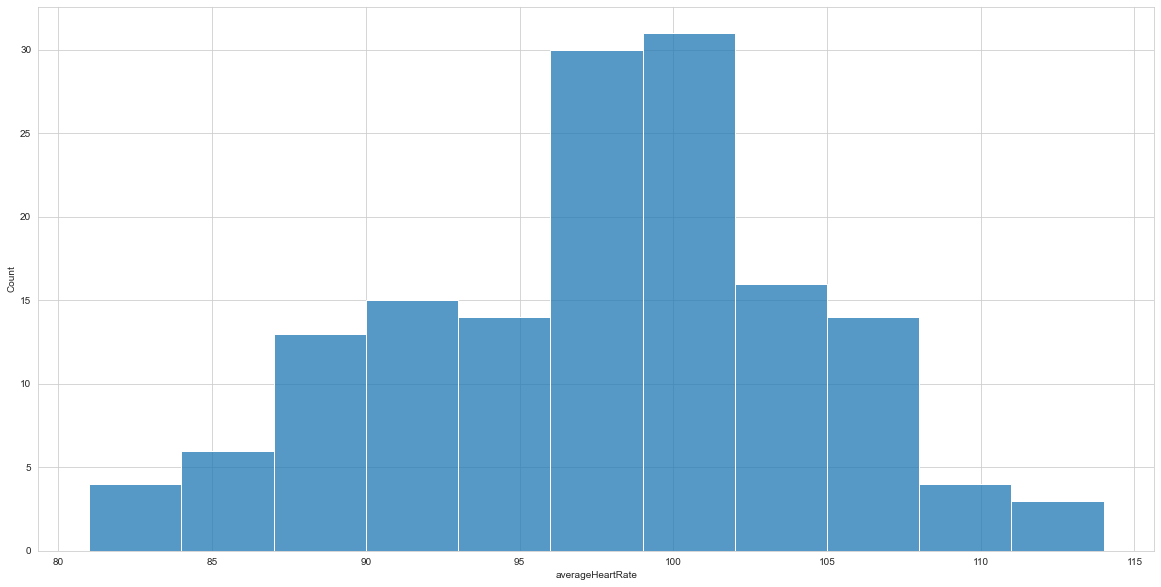

In [49]:
# Create histogram of participant 1 (p01) average heart rate while walking for exercise
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.histplot(p01_walk.averageHeartRate)

<AxesSubplot:xlabel='averageHeartRate', ylabel='Count'>

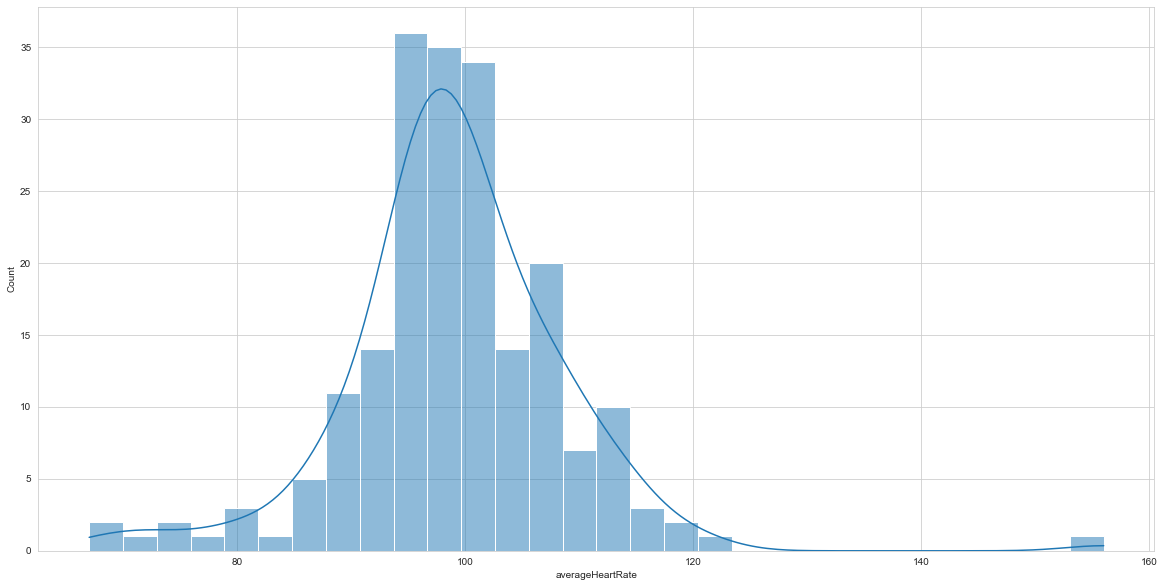

In [50]:
# Create histogram of participant 2 (p02) average heart rate while walking for exercise
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.histplot(data=p02_walk, x="averageHeartRate", kde=True)

<AxesSubplot:xlabel='averageHeartRate', ylabel='Count'>

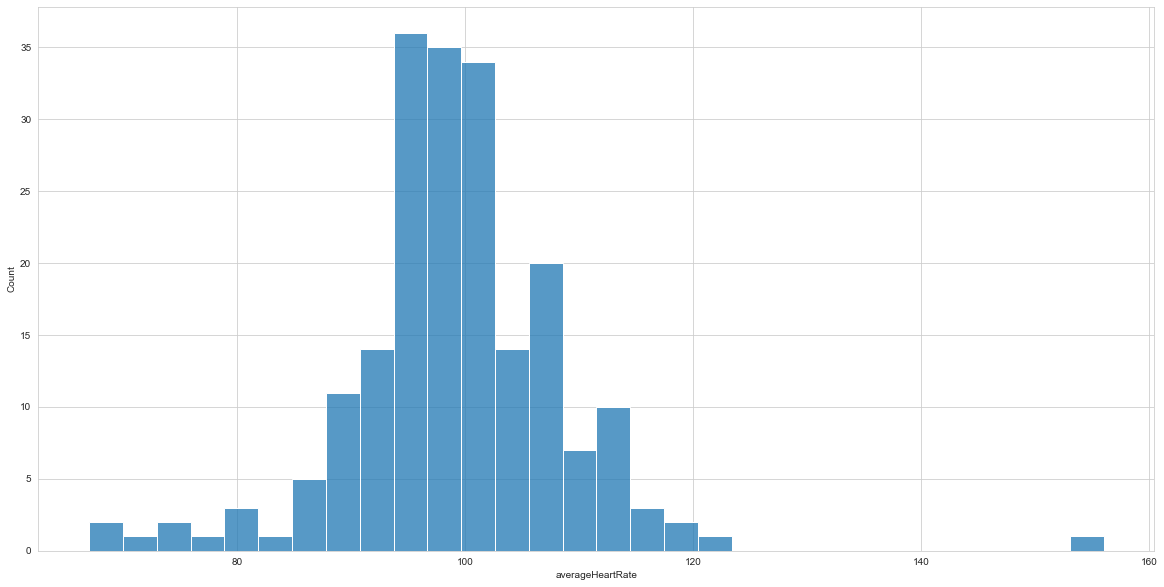

In [51]:
# Create histogram of participant 2 (p02) average heart rate while walking for exercise
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.histplot(p02_walk.averageHeartRate)

<AxesSubplot:xlabel='averageHeartRate', ylabel='Count'>

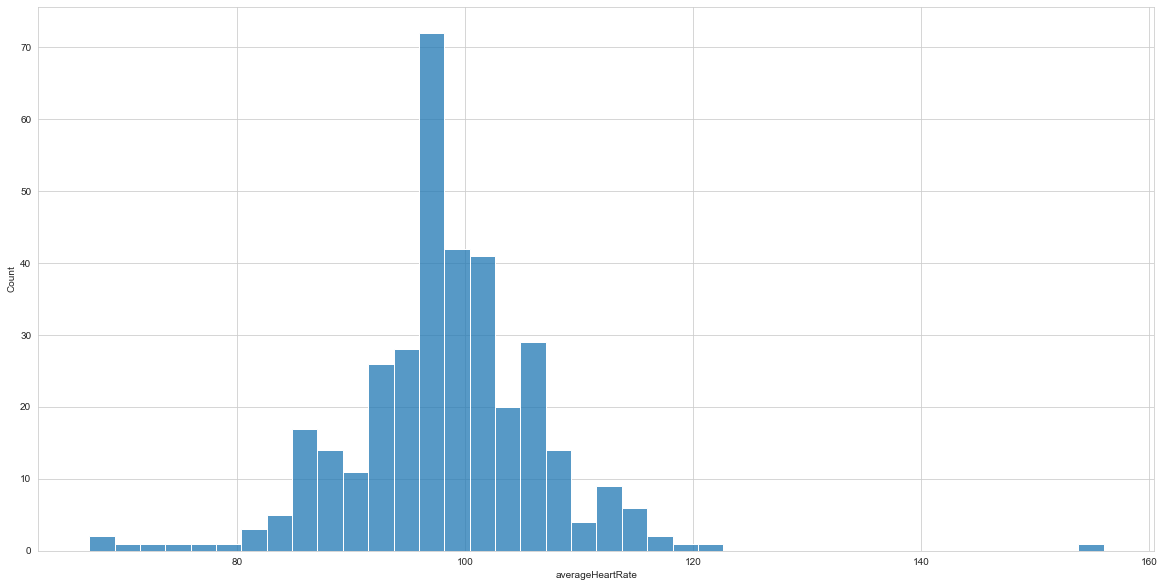

In [52]:
# Create histogram of both participants average heart rate while walking for exercise
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.histplot(Participant_info.averageHeartRate)

***

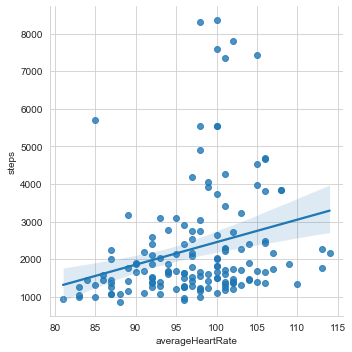

In [53]:
# Create scatterplot of participant 1 (p01) average heart rate to their steps while walking for exercise
sns.lmplot(x='averageHeartRate', y='steps', data=p01_walk)

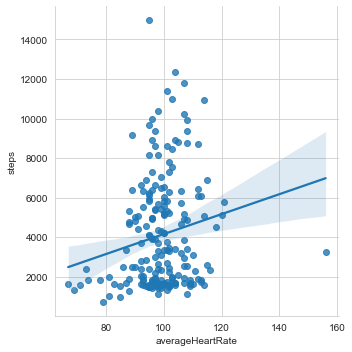

In [54]:
# Create scatterplot of participant 2 (p02) average heart rate to their steps while walking for exercise
sns.lmplot(x='averageHeartRate', y='steps', data=p02_walk)

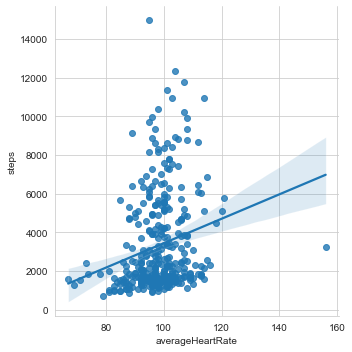

In [55]:
# Create scatterplot of both participants average heart rate to their steps while walking for exercise
sns.lmplot(x='averageHeartRate', y='steps', data=Participant_info)

***

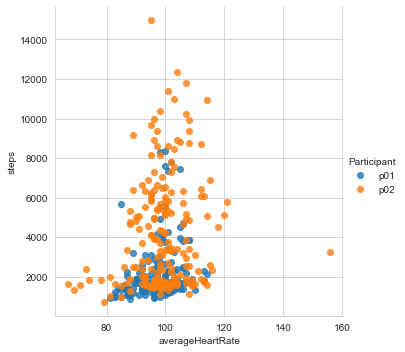

In [56]:
# Create scatterplot arguments of both participants average heart rate to their steps while walking for exercise
sns.lmplot(x='averageHeartRate', y='steps', data=Participant_info,
           fit_reg=False, # No regression line
           hue='Participant')   # Color by evolution stage

(0.0, 140.0)

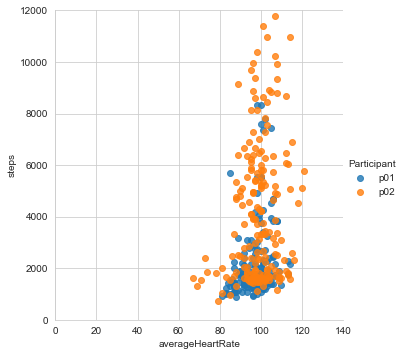

In [57]:
# Create seaborn plot of both participants average heart rate to their steps while walking for exercise
sns.lmplot(x='averageHeartRate', y='steps', data=Participant_info,
           fit_reg=False, 
           hue='Participant')
 
# Establish plot max using Matplotlib
plt.ylim(0, 12000)
plt.xlim(0, 140)

***

<AxesSubplot:xlabel='Month', ylabel='steps'>

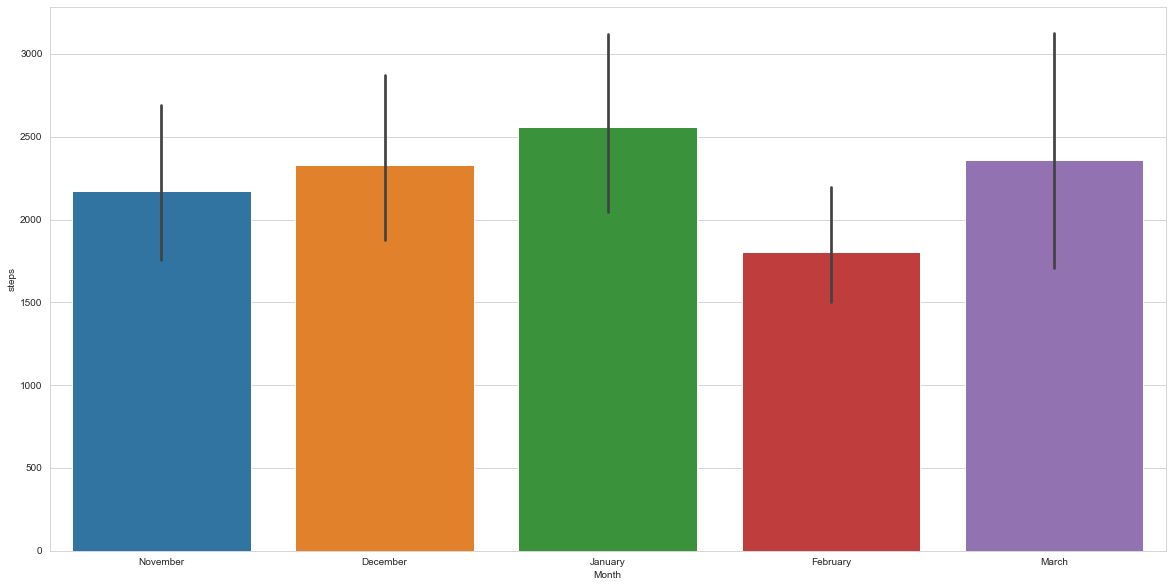

In [58]:
# Create bar chart of participant 1 (p01) steps by month
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.barplot(data=p01_walk, x="Month", y="steps")

Interpretation: Participant 1 took more steps in January. 

<AxesSubplot:xlabel='Month', ylabel='steps'>

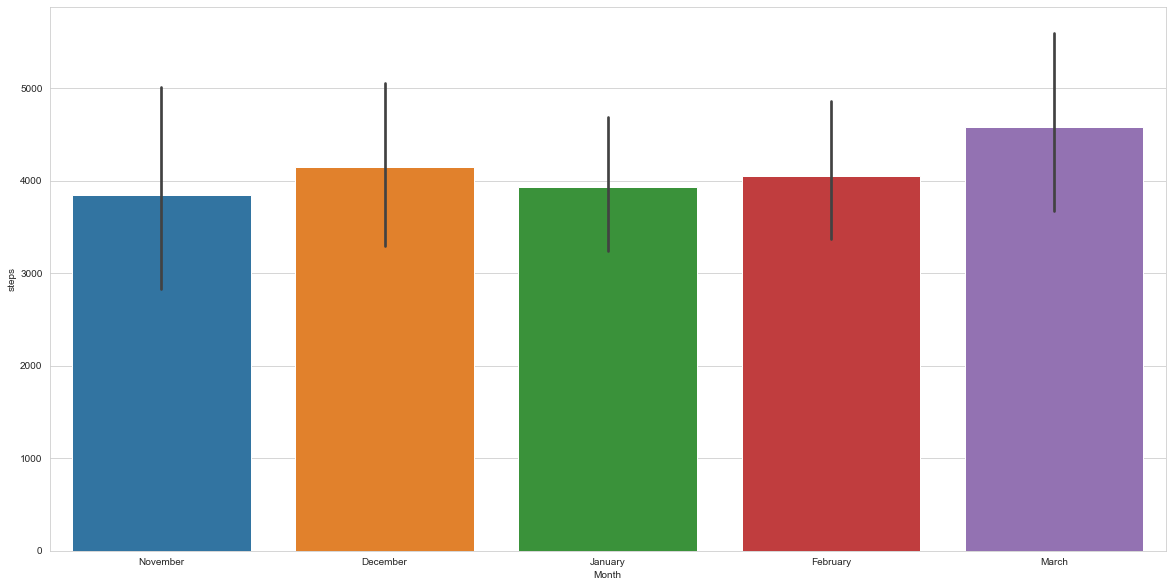

In [59]:
# Create bar chart of participant 2 (p02) steps by month
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.barplot(data=p02_walk, x="Month", y="steps")

Interpretation: Participant 2 took more steps in March.

<AxesSubplot:xlabel='Month', ylabel='steps'>

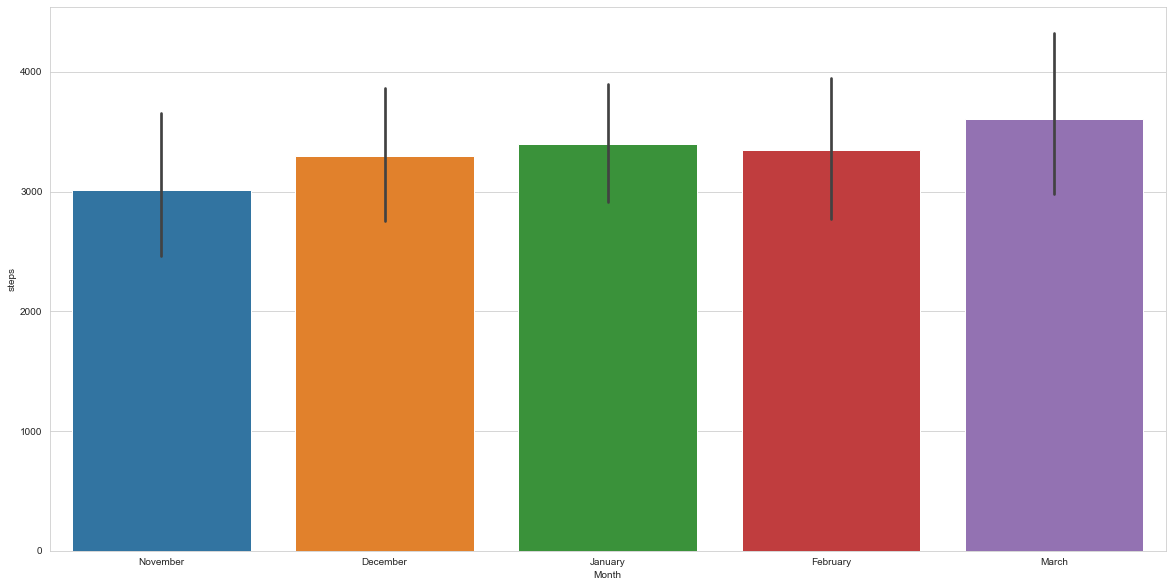

In [60]:
# Create bar chart of both participants steps by month
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.barplot(data=Participant_info, x="Month", y="steps")

***

<AxesSubplot:xlabel='Month', ylabel='averageHeartRate'>

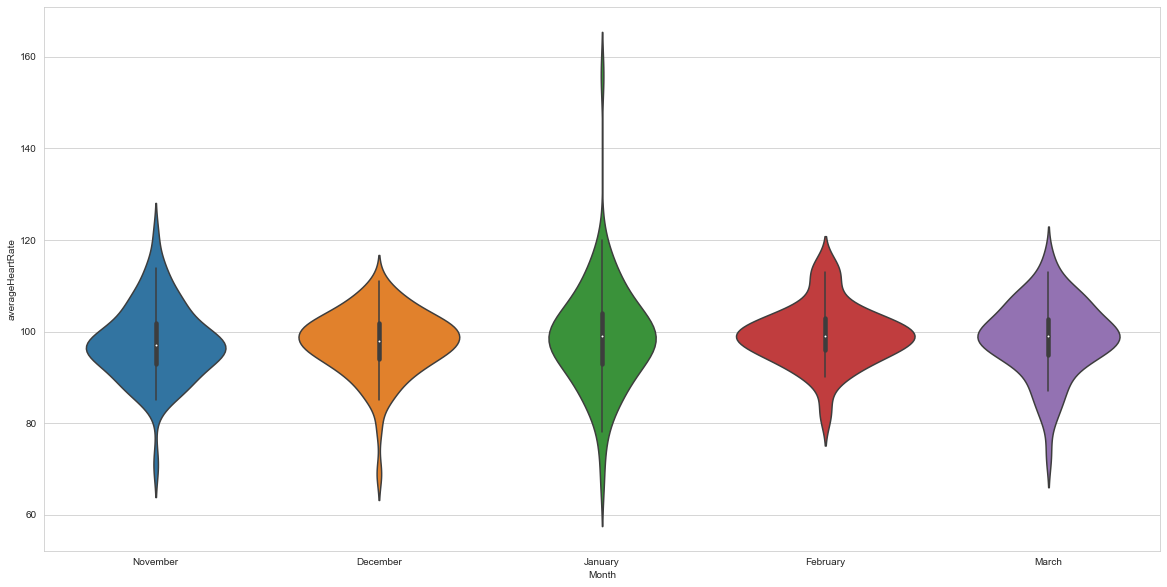

In [61]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot created to observe the distribution of both participants average heart rate by month.
# The peaks, valleys, and tails show density curve. Show where average heart rates are similar or different.
# Violin plot
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.violinplot(x='Month', y='averageHeartRate', data=Participant_info)

<AxesSubplot:xlabel='Month', ylabel='averageHeartRate'>

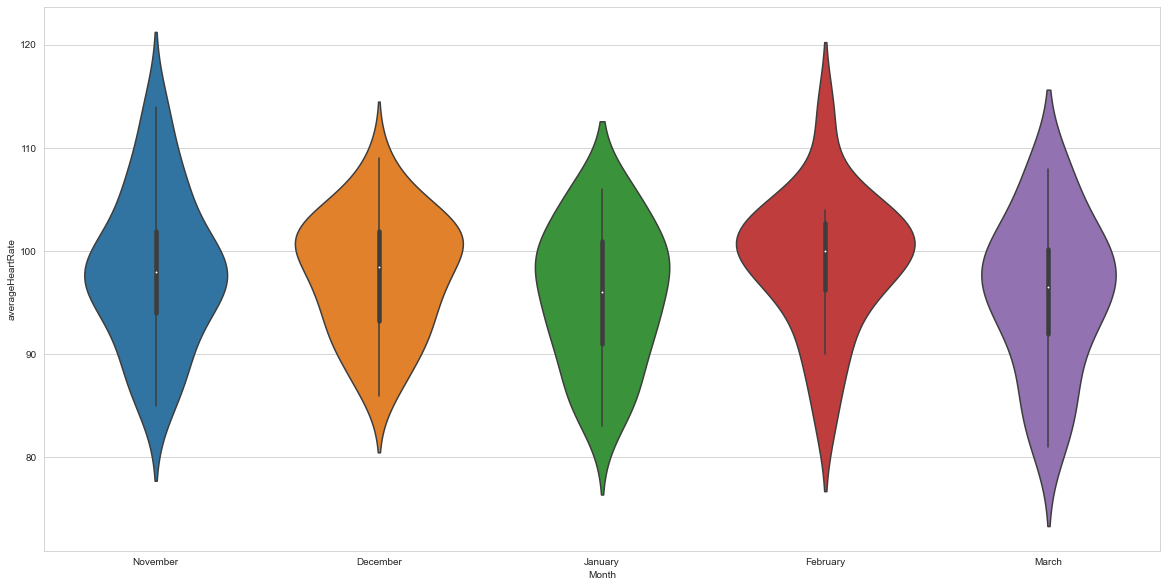

In [62]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot of particpant 1 (p01) average heart rate by month
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.violinplot(x='Month', y='averageHeartRate', data=p01_walk)

<AxesSubplot:xlabel='Month', ylabel='averageHeartRate'>

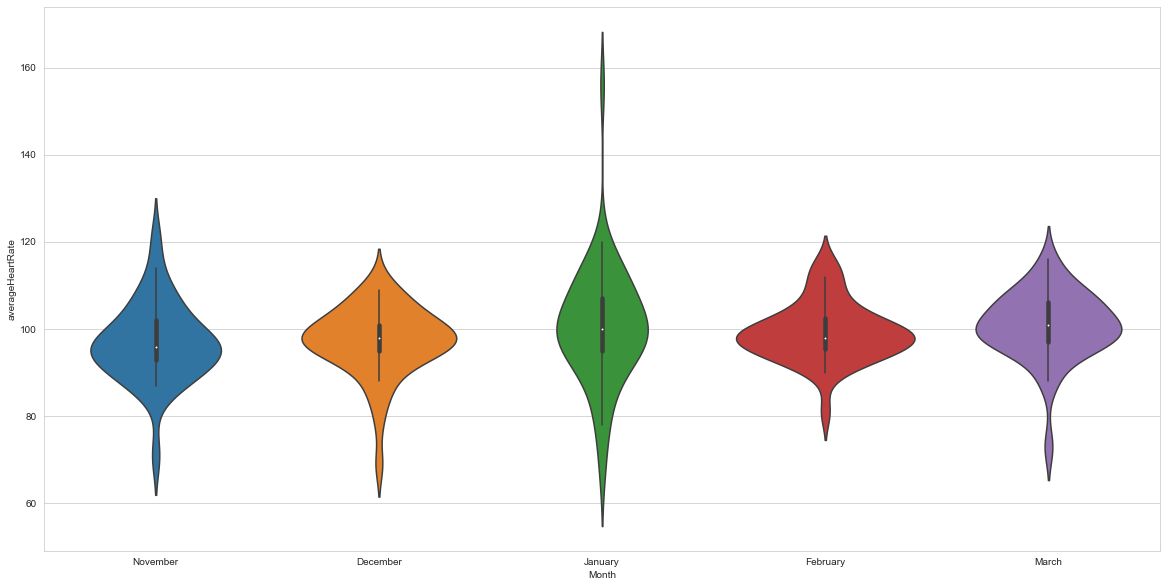

In [63]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot of particpant 2 (p02) average heart rate by month
plt.figure(figsize=(20,10)) # Set plot dimensions
sns.violinplot(x='Month', y='averageHeartRate', data=p02_walk)

***

<AxesSubplot:xlabel='Month', ylabel='averageHeartRate'>

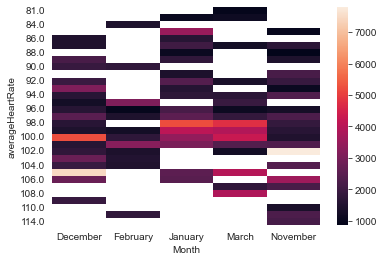

In [64]:
# Pivot table - heat map. Displays participant 1 (p01) average heart rate, steps by month.
pivot = p01_walk.pivot_table(
    index=["averageHeartRate"],
    columns=["Month"],
    values="steps",
    aggfunc=np.average)
sns.heatmap(pivot)

<AxesSubplot:xlabel='Month', ylabel='averageHeartRate'>

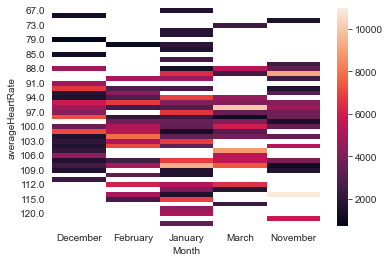

In [65]:
# Pivot table - heat map. Displays participant 2 (p02) average heart rate, steps by month.
pivot = p02_walk.pivot_table(
    index=["averageHeartRate"],
    columns=["Month"],
    values="steps",
    aggfunc=np.average)
sns.heatmap(pivot)

<AxesSubplot:xlabel='Month', ylabel='averageHeartRate'>

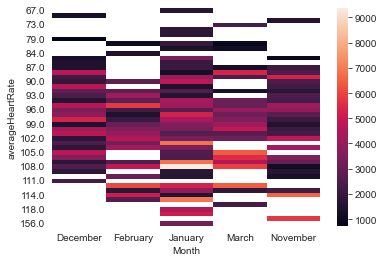

In [66]:
# Pivot table - heat map. Displays both participants average heart rate, steps by month.
pivot = Participant_info.pivot_table(
    index=["averageHeartRate"],
    columns=["Month"],
    values="steps",
    aggfunc=np.average)
sns.heatmap(pivot)

***

#### Feature 4 - Best practices
Utilize a virtual environment with instructions in README.md